In [1]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import expon, lomax, norm, chi2

In [2]:
ALPHA = 0.05

N = 15
SIGMA = 10

np.random.seed(111)
YSample = expon.rvs(scale=SIGMA, size=N)

---

In [3]:
def RelativeLogLikelihood(sigma, data):
    n = len(data)
    y_bar = data.mean()
    return n * (np.log(y_bar / sigma) + 1 - y_bar / sigma)

---

In [4]:
# MLE
YBar = YSample.mean()

# Get confidence interval for sigma based on the CLT
LowSigma, UppSigma =  norm.ppf(ALPHA/2, YBar, YBar / np.sqrt(N)), norm.ppf(1- ALPHA/2, YBar, YBar / np.sqrt(N))

In [5]:
# Vector if values to evaluate the relative log-likelihood
sigma_vect = np.linspace(4, 24, 100)

# Relative log-likelihood
r_vect = RelativeLogLikelihood(sigma_vect, YSample)

# Get confidence interval for sigma based on a likelihood interval
logc = -0.5 * chi2.ppf(1-ALPHA, 1)
LowSigmaLike, UppSigmaLike = sigma_vect[r_vect >= logc][[0,-1]]

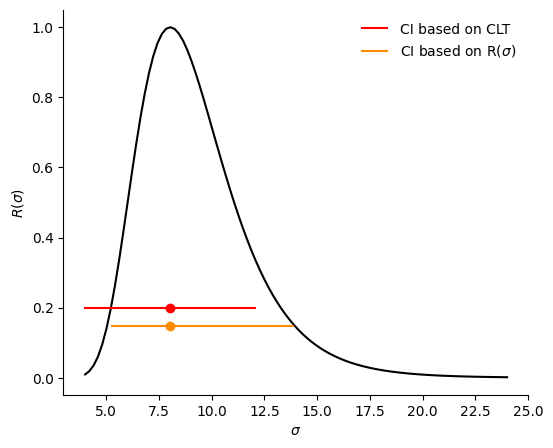

In [6]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(sigma_vect, np.exp(r_vect), color="k")

ax.hlines(0.2, LowSigma, UppSigma, color='red', label="CI based on CLT")
ax.hlines(np.exp(logc), LowSigmaLike, UppSigmaLike, color='darkorange', label=r"CI based on R($\sigma$)")
ax.scatter(YBar, 0.2, color='red')
ax.scatter(YBar, np.exp(logc), color='darkorange')

ax.set_xlabel(r"$\sigma$")
ax.set_ylabel(r"$R(\sigma)$")
ax.legend(frameon=False)
ax.spines[['right', 'top']].set_visible(False)

In [7]:
LowY, UppY = lomax.ppf([ALPHA/2, 1-ALPHA/2], N+1, scale=YSample.sum())

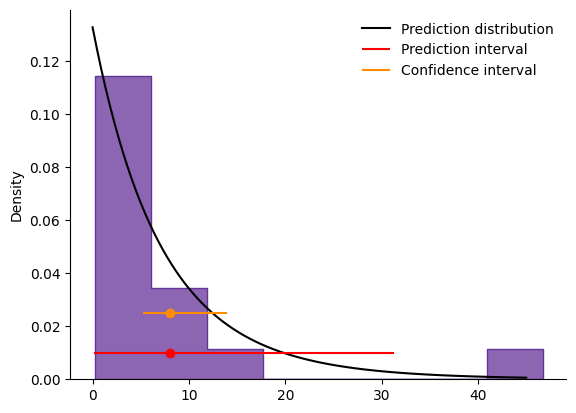

In [8]:
y_vect = np.linspace(0, 45, 100)

ax = sns.histplot(YSample, stat="density", color="rebeccapurple", element="step")
ax.plot(y_vect, lomax.pdf(y_vect, N+1, scale=YSample.sum()), color="k", label="Prediction distribution")

ax.hlines(0.01, LowY, UppY, color='red', label="Prediction interval")
ax.hlines(0.025, LowSigmaLike, UppSigmaLike, color='darkorange', label="Confidence interval")
ax.scatter(YBar, 0.01, color='red')
ax.scatter(YBar, 0.025, color='darkorange')

ax.legend(frameon=False)
ax.spines[['right', 'top']].set_visible(False)